# GRIP Task 1 - Prediction using Supervised ML
## Author: Tanmay Pawar

## DataSet Link - http://bit.ly/w-data

# Importing Libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Importing Dataset

In [139]:
url = "http://bit.ly/w-data" # URL containing the dataset
df = pd.read_csv(url) # Importing the dataset
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Analyzing The Data

In [140]:
df.isnull().sum() # counting the number of null values in the given dataset

Hours     0
Scores    0
dtype: int64

In [141]:
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


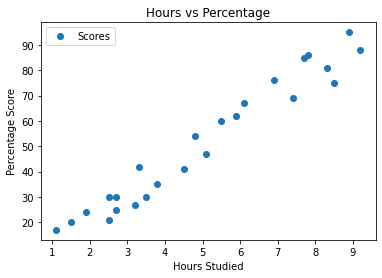

In [142]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### As we can see from the above graph there is a positive correlation between the two features (hours and scores). i.e as the hours studied increases, the percentage score also increases.
### Now lets try using scatter matrix.

array([[<AxesSubplot:xlabel='Hours', ylabel='Hours'>,
        <AxesSubplot:xlabel='Scores', ylabel='Hours'>],
       [<AxesSubplot:xlabel='Hours', ylabel='Scores'>,
        <AxesSubplot:xlabel='Scores', ylabel='Scores'>]], dtype=object)

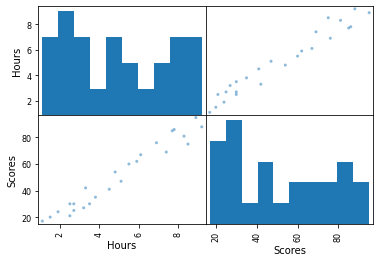

In [143]:
pd.plotting.scatter_matrix(df) # Scatter matrix showing correlation between all features

# Train Test Split

In [144]:
X = df.iloc[:,:-1] # features
Y = df.iloc[:,1] # Target Values

In [145]:
# Splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

### In the above code, we have split the data into training data and testing data. We have taken 80% training data and 20% testing data.

# Training and Pedicting

In [146]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

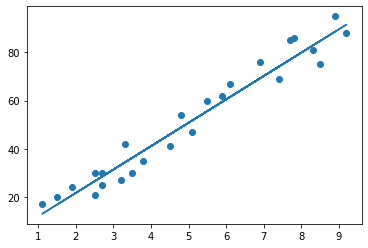

In [153]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [147]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

    Hours
9     2.7
18    6.1
5     1.5
23    6.9
20    2.7


In [148]:
# Comparing Actual vs Predicted
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
9,25,28.539113
18,67,61.495150
5,20,16.907571
23,76,69.249512
20,30,28.539113


In [149]:
# Predicting for 9.25 hours
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.02794903245592


# Evaluating the Model

In [150]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.069553428769706


In [151]:
print("R2 Score : ", r2_score(y_test,y_pred))

R2 Score :  0.962723412252476


## The Accuracy of this model is 96%